In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')
# 设置支持中文的字体（例如 SimHei）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [3]:
df = pd.read_csv(r'./breast cancer.csv')

In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## 清理并准备数据

In [6]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})#1为恶性0为良性
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


radius_mean , perimeter _mean, area_mean have a high correlation with malignant tumor

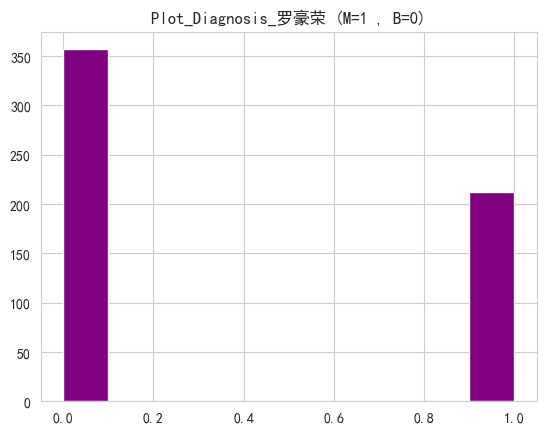

In [13]:
plt.hist(df['diagnosis'], color='purple')
plt.title('Plot_Diagnosis_罗豪荣 (M=1 , B=0)')
plt.show()

also there is multicollinearity between the attributes compactness, concavity, and concave points. So we can choose just ONE
out of these, I am going for Compactness.

In [14]:
# 删除所有worst列
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# 删除与perimeter和area相关的列
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# 删除与concavity和concave points相关的列
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# 确认剩下的列有哪些，后续要作为输入量
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

## 构建模型

In [15]:
X=df.drop(['diagnosis'],axis=1)#除是否为恶性的其它列都是输入
y = df['diagnosis']#阳/阴性是输出标签

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)#划分训练集和测试集，random_state=40确保可重复性

### 特征缩放

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#对数据集的特征进行标准化（正态分布）
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

### 多种回归模型

#### Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
import os
# 模型训练和超参数调优
# 使用 GridSearchCV 寻找最佳超参数
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_
print("最佳超参数:", grid_search.best_params_)
# 预测
prediction1 = best_lr.predict(X_test)

最佳超参数: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


混淆矩阵:
 [[108   7]
 [  3  53]]


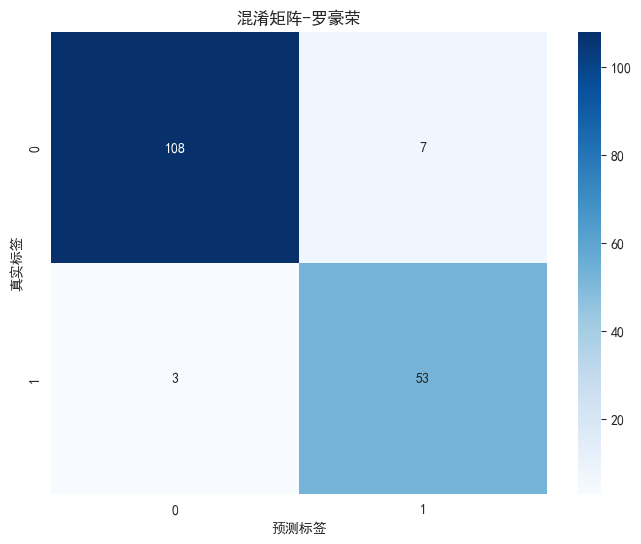

In [21]:
# 混淆矩阵
cm = confusion_matrix(y_test, prediction1)
print("混淆矩阵:\n", cm)
# 混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵-罗豪荣')
plt.savefig('./picture/Logistic Regression/confusion_matrix.png')
plt.show()


In [22]:
# 性能报告
print("\n分类报告:\n", classification_report(y_test, prediction1))
# 手动计算准确率 (验证)
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
manual_accuracy = (TP + TN) / (TP + TN + FN + FP)
print('测试集精确度 (手动计算):', manual_accuracy)
print('测试集精确度 (调用库函数):', accuracy_score(y_test, prediction1))


分类报告:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       115
           1       0.88      0.95      0.91        56

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

测试集精确度 (手动计算): 0.9415204678362573
测试集精确度 (调用库函数): 0.9415204678362573


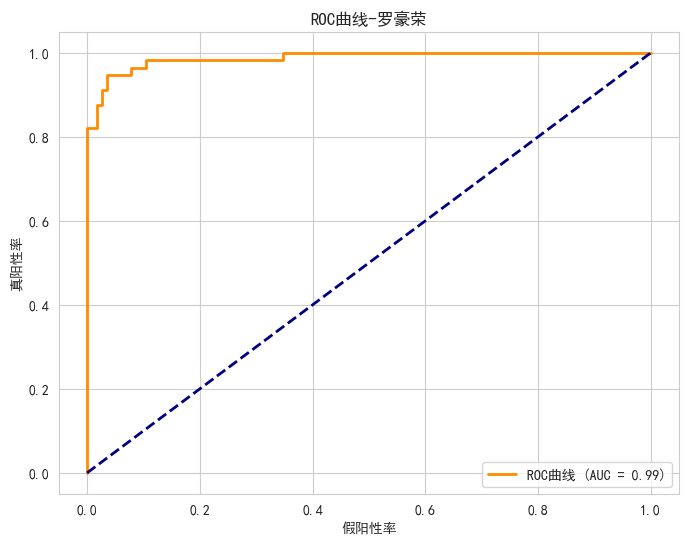

In [23]:
# ROC 曲线和 AUC
y_pred_proba = best_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('ROC曲线-罗豪荣')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('./picture/Logistic Regression/roc_curve.png')
plt.show()

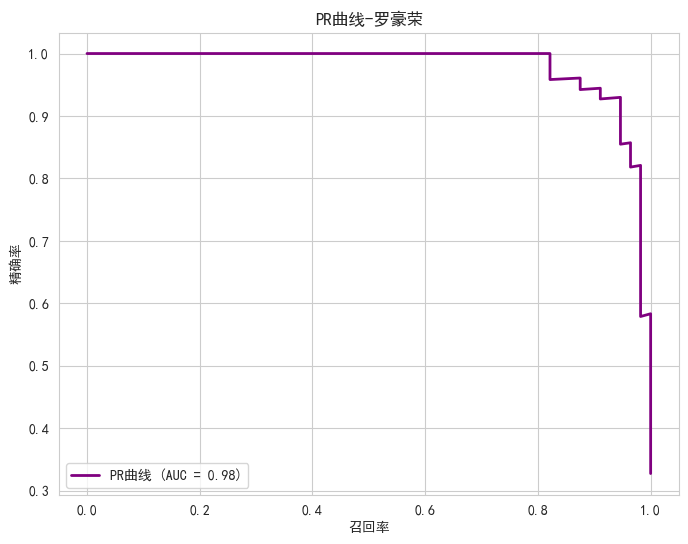


PR曲线 AUC: 0.98


In [24]:
# PR 曲线
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR曲线 (AUC = {auc_pr:.2f})')
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.title('PR曲线-罗豪荣')
plt.legend(loc="lower left")
plt.grid(True)
plt.savefig('./picture/Logistic Regression/pr_curve.png')
plt.show()

print(f'\nPR曲线 AUC: {auc_pr:.2f}')

#### Decision Tree

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
# 模型训练和超参数调优
# 使用 GridSearchCV 寻找最佳超参数
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dtc = grid_search.best_estimator_
print("最佳超参数:", grid_search.best_params_)

# 预测
prediction2 = best_dtc.predict(X_test)

最佳超参数: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


混淆矩阵:
 [[103  12]
 [  5  51]]


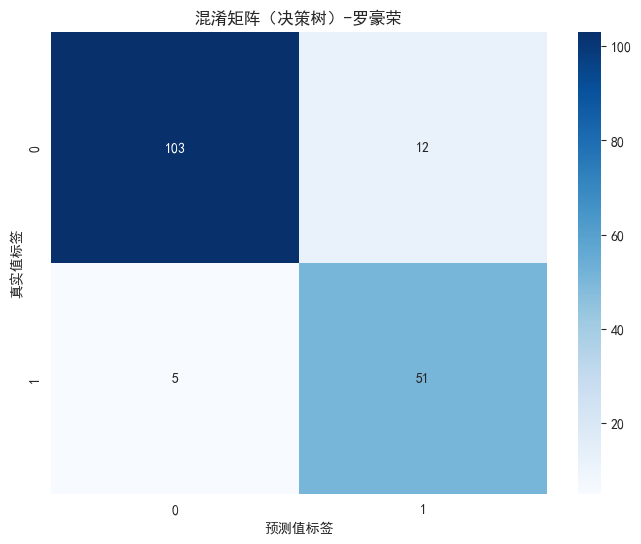

In [26]:
# 混淆矩阵
cm2 = confusion_matrix(y_test, prediction2)
print("混淆矩阵:\n", cm2)
# 混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测值标签')
plt.ylabel('真实值标签')
plt.title('混淆矩阵（决策树）-罗豪荣')
plt.savefig('./picture/Decision Tree/confusion_matrix_dtc.png')
plt.show()


分类报告:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       115
           1       0.81      0.91      0.86        56

    accuracy                           0.90       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.91      0.90      0.90       171

精确度: 0.9005847953216374


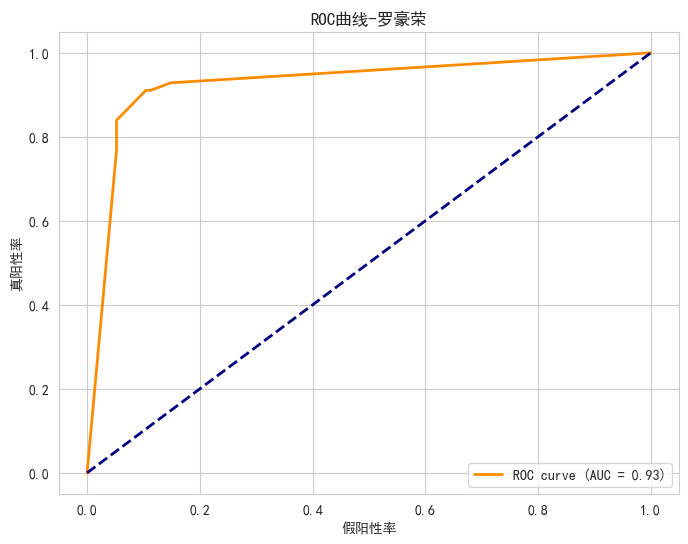

In [28]:
# 性能报告
print("\n分类报告:\n", classification_report(y_test, prediction2))

# 准确率
accuracy = accuracy_score(y_test, prediction2)
print("精确度:", accuracy)

# ROC 曲线和 AUC (需要概率预测，因此确保你的问题是二分类)
if len(np.unique(y)) == 2:  # 检查是否为二分类问题
    y_pred_proba = best_dtc.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('假阳性率')
    plt.ylabel('真阳性率')
    plt.title('ROC曲线-罗豪荣')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig('./picture/Decision Tree/roc_curve_dtc.png')
    plt.show()

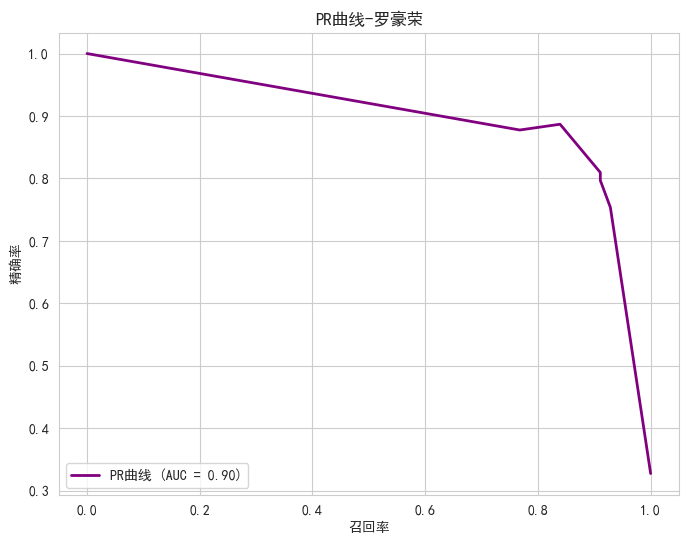


PR曲线 AUC: 0.90


In [29]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR曲线 (AUC = {auc_pr:.2f})')
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.title('PR曲线-罗豪荣')
plt.legend(loc="lower left")
plt.grid(True)
plt.savefig('./picture/Decision Tree/pr_curve_dtc.png')
plt.show()
print(f'\nPR曲线 AUC: {auc_pr:.2f}')

#### Random Forest

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc

# 超参数调优 (使用 GridSearchCV)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', None]
}

rfc = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rfc = grid_search.best_estimator_
print("最佳超参数:", grid_search.best_params_)

# 在测试集上进行预测
prediction3 = best_rfc.predict(X_test)
y_pred_proba_rf = best_rfc.predict_proba(X_test)[:, 1] # 获取正类的预测概率

最佳超参数: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [31]:
# 评估报告
print("\n分类报告:")
print(classification_report(y_test, prediction3))
accuracy = accuracy_score(y_test, prediction3)
print("精确度:", accuracy)


分类报告:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       115
           1       0.88      0.89      0.88        56

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171

精确度: 0.9239766081871345


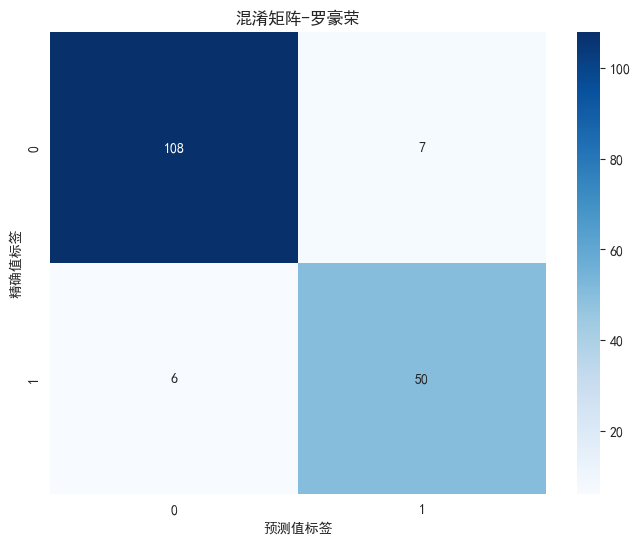

In [32]:
#混淆矩阵可视化
cm = confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('预测值标签')
plt.ylabel('精确值标签')
plt.title('混淆矩阵-罗豪荣')
plt.savefig('./picture/Random Forest/confusion_matrix_dtc.png')
plt.show()

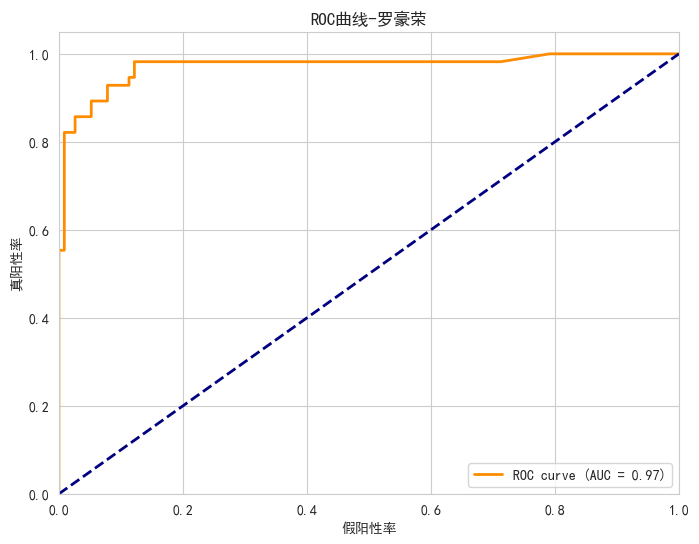


ROC曲线的AUC: 0.97


In [33]:
# 5. ROC 曲线和 AUC 值
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('ROC曲线-罗豪荣')
plt.legend(loc="lower right")
plt.savefig('./picture/Random Forest/roc_curve_dtc.png')
plt.show()

print(f"\nROC曲线的AUC: {auc_rf:.2f}")


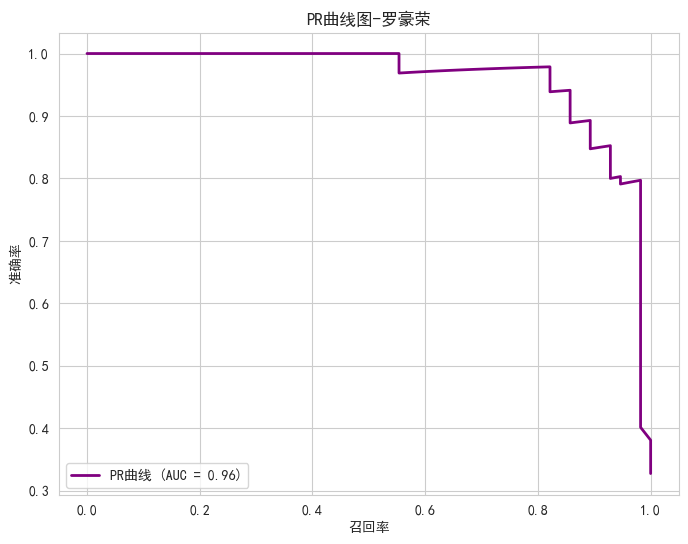


PR曲线图的AUC: 0.96


In [34]:
# 6. 精确率-召回率曲线
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
auc_pr_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='purple', lw=2, label=f'PR曲线 (AUC = {auc_pr_rf:.2f})')
plt.xlabel('召回率')
plt.ylabel('准确率')
plt.title('PR曲线图-罗豪荣')
plt.legend(loc="lower left")
plt.savefig('./picture/Random Forest/pr_curve.png.png')
plt.show()
print(f"\nPR曲线图的AUC: {auc_pr_rf:.2f}")

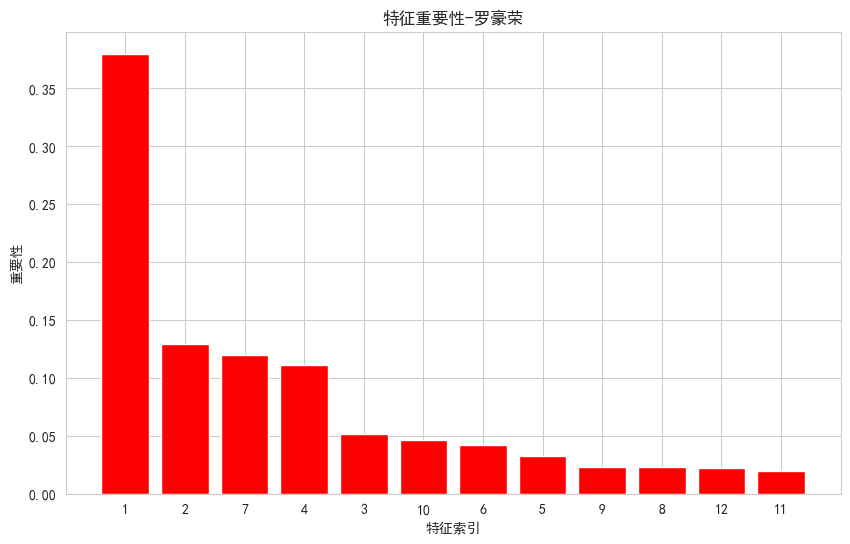

In [36]:
# 7. 特征重要性可视化
importances = best_rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("特征重要性-罗豪荣")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices + 1)
plt.xlim([-1, X.shape[1]])
plt.xlabel("特征索引")
plt.ylabel("重要性")
plt.show()

#### TabNet

In [37]:
#导入Transformer TabNet必要的包，将数据转换为TabNet要求的格式
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import ParameterGrid
# 确保数据格式正确
X_train_T = X_train.astype(np.float32)
X_test_T = X_test.astype(np.float32)
y_train_T = y_train.astype(np.int32).values
y_test_T = y_test.astype(np.int32).values

In [38]:
#定义超参数搜索空间，模型训练，找出最佳参数
param_grid = {
    'n_d': [8, 16],  # 网络宽度
    'n_a': [8, 16],  # 注意力宽度
    'n_steps': [3, 5],  # 注意力步数
    'lr': [2e-2, 1e-2],  # 学习率
    'lambda_sparse': [1e-3, 1e-4],  # 稀疏正则化
}
# 存储最佳参数和性能
best_accuracy = 0
best_params = None
best_model = None
# 超参数调优
for params in ParameterGrid(param_grid):
    print(f"正在测试参数组合: {params}")
    model = TabNetClassifier(
        n_d=params['n_d'],
        n_a=params['n_a'],
        n_steps=params['n_steps'],
        gamma=1.5,  # 特征重用参数
        lambda_sparse=params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=params['lr'], weight_decay=1e-5),  # 添加 L2 正则化
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0
    )
    # 训练模型
    model.fit(
        X_train_T, y_train_T,
        eval_set=[(X_test_T, y_test_T)],
        eval_metric=['accuracy'],
        max_epochs=200,  # 最大轮数
        patience=20,  # 早停
        batch_size=64,  # 调整批大小
        virtual_batch_size=256,
        num_workers=0,
        drop_last=False
    )
    # 评估
    y_pred = model.predict(X_test_T)
    accuracy = accuracy_score(y_test_T, y_pred)
    print(f"当前参数组合准确率: {accuracy:.4f}")
    # 保存最佳模型
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model
# 输出最佳参数和准确率
print(f"\n最佳参数: {best_params}")
print(f"最佳测试集准确率: {best_accuracy:.2f}")


正在测试参数组合: {'lambda_sparse': 0.001, 'lr': 0.02, 'n_a': 8, 'n_d': 8, 'n_steps': 3}

Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_accuracy = 0.95906
当前参数组合准确率: 0.9591
正在测试参数组合: {'lambda_sparse': 0.001, 'lr': 0.02, 'n_a': 8, 'n_d': 8, 'n_steps': 5}

Early stopping occurred at epoch 64 with best_epoch = 44 and best_val_0_accuracy = 0.94152
当前参数组合准确率: 0.9415
正在测试参数组合: {'lambda_sparse': 0.001, 'lr': 0.02, 'n_a': 8, 'n_d': 16, 'n_steps': 3}

Early stopping occurred at epoch 37 with best_epoch = 17 and best_val_0_accuracy = 0.96491
当前参数组合准确率: 0.9649
正在测试参数组合: {'lambda_sparse': 0.001, 'lr': 0.02, 'n_a': 8, 'n_d': 16, 'n_steps': 5}

Early stopping occurred at epoch 27 with best_epoch = 7 and best_val_0_accuracy = 0.91813
当前参数组合准确率: 0.9181
正在测试参数组合: {'lambda_sparse': 0.001, 'lr': 0.02, 'n_a': 16, 'n_d': 8, 'n_steps': 3}

Early stopping occurred at epoch 45 with best_epoch = 25 and best_val_0_accuracy = 0.95322
当前参数组合准确率: 0.9532
正在测试参数组合: {'lambda_sparse': 0.001, 'lr': 0.

In [ ]:
# 使用最佳模型进行预测
y_pred = best_model.predict(X_test_T)
y_pred_proba = best_model.predict_proba(X_test_T)[:, 1]
# 添加分类性能报告
from sklearn.metrics import classification_report
print("\nTabNet分类性能报告:")
print(classification_report(y_test_T, y_pred, target_names=['良性 (0)', '恶性 (1)']))
# 混淆矩阵
cm = confusion_matrix(y_test_T, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('TabNet混淆矩阵-罗豪荣')
plt.savefig('./picture/TabNet/confusion_matrix.png')
plt.show()

In [ ]:
# PR 曲线及 AUC
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_T, y_pred_proba)
auc_pr = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR 曲线 (AUC = {auc_pr:.2f})')
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.title('TabNet PR曲线图-罗豪荣')
plt.legend(loc="lower left")
plt.grid(True)
plt.savefig('./picture/TabNet/pr_curve.png')
plt.show()


In [ ]:
# 特征重要性图
feature_importance = pd.DataFrame({'Feature': X.columns})
feature_importance['Importance'] = best_model.feature_importances_  # TabNet 提供特征重要性
feature_importance = feature_importance.sort_values('Importance', ascending=False)
# 打印特征重要性
print("\nTabNet特征重要性:")
print(feature_importance.to_string(index=False))
# 绘制特征重要性条形图
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('TabNet特征重要性图-罗豪荣', fontsize=14)
plt.xlabel('重要性', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.savefig('./picture/TabNet/feature_importance_optimized.png')
plt.show()